# 1. Load the Heart Disease UCI dataset into a Pandas DataFrame.
**Steps:**

* Import the dataset from UCI repository.
* Split the dataset into features (`X`) and target (`y`).
* Check dataset metadata and variables info.
* Show first few rows and check the shape of data.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [2]:
# metadata 
print(heart_disease.metadata) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
# variable information 
print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [4]:
print(f'Shape of X: {X.shape}')
X.head()

Shape of X: (303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
print(f'Shape of y: {y.shape}')
y.head()

Shape of y: (303, 1)


,num
0,0
1,2
2,1
3,0
4,0


**Results:**

* Data successfully loaded.
* Features shape: `(rows, columns)` and target shape printed.
* Metadata and variable descriptions reviewed.

---

# 2. Handle missing values (imputation or removal).
**Steps:**
* Check for missing values in features and target.
* Identify which columns have missing values.
* Handle missing values (drop or impute).
* Merge features and target into one DataFrame for easier handling.

In [6]:
print(f'Number of missing values in X: {X.isnull().sum().sum()}')
print(X.isnull().sum())

print(f'\n\nNumber of missing values in y: {y.isnull().sum().sum()}')
print(y.isnull().sum())


Number of missing values in X: 6
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


Number of missing values in y: 0
num    0
dtype: int64


In [7]:
cols_with_missing = X.columns[X.isnull().any()].tolist()
print(f"\nColumns with missing values: {cols_with_missing}")


Columns with missing values: ['ca', 'thal']


In [ ]:
import pandas as pd

df = pd.concat([X, y], axis=1) # Combine features and target
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.dropna(inplace=True) # Drop rows with missing values

print(f'Shape after dropping NA: {df.shape}')


Shape after dropping NA: (297, 14)


**Results:**
* Missing values detected in some columns.
* After cleaning, dataset shape reduced (rows with NaN removed).
* Final dataset is clean and ready for further analysis.

---

# 3. Perform data encoding (one-hot encoding for categorical variables).
**Steps:**

* Identify categorical columns (e.g., `sex`, `cp`, `thal`).
* Explore unique values of categorical columns.
* Apply one-hot encoding to convert categorical features into numeric format.


In [10]:
for col in df.columns:
    # number of unique values in column
    print(f'Column: {col}, Number of unique values: {df[col].nunique()}')
    # data type of column
    print(f'Data type: {df[col].dtype}\n')

Column: age, Number of unique values: 41
Data type: int64

Column: sex, Number of unique values: 2
Data type: int64

Column: cp, Number of unique values: 4
Data type: int64

Column: trestbps, Number of unique values: 50
Data type: int64

Column: chol, Number of unique values: 152
Data type: int64

Column: fbs, Number of unique values: 2
Data type: int64

Column: restecg, Number of unique values: 3
Data type: int64

Column: thalach, Number of unique values: 91
Data type: int64

Column: exang, Number of unique values: 2
Data type: int64

Column: oldpeak, Number of unique values: 40
Data type: float64

Column: slope, Number of unique values: 3
Data type: int64

Column: ca, Number of unique values: 4
Data type: float64

Column: thal, Number of unique values: 3
Data type: float64

Column: num, Number of unique values: 5
Data type: int64



In [11]:
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_data:
    print(f'Column: {col},\n\tUnique values: {df[col].unique()}')
    print(f'\tData type: {df[col].dtype}')
    

Column: sex,
	Unique values: [1 0]
	Data type: int64
Column: cp,
	Unique values: [1 4 3 2]
	Data type: int64
Column: fbs,
	Unique values: [1 0]
	Data type: int64
Column: restecg,
	Unique values: [2 0 1]
	Data type: int64
Column: exang,
	Unique values: [0 1]
	Data type: int64
Column: slope,
	Unique values: [3 2 1]
	Data type: int64
Column: ca,
	Unique values: [0. 3. 2. 1.]
	Data type: float64
Column: thal,
	Unique values: [6. 3. 7.]
	Data type: float64


In [ ]:
# Apply one-hot encoding to categorical features
df = pd.get_dummies(df, columns=categorical_data, drop_first=True) 
print(f'Shape after one-hot encoding: {df.shape}')
df.head()

Shape after one-hot encoding: (297, 21)


,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67,160,286,108,1.5,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67,120,229,129,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37,130,250,187,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41,130,204,172,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


**Results:**

* All categorical columns encoded into dummy variables.

---

# 4. Standardize numerical features using MinMaxScaler or StandardScaler.
**Steps:**
* Split data into training and testing sets.
* Apply scaling (StandardScaler) on numerical features.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (237, 20)
Shape of y_train: (237,)
Shape of X_test: (60, 20)
Shape of y_test: (60,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Get numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Apply standard scaling to training numerical features
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply the same transformation on test data (without refitting)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [15]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
277,-1.741679,0.319284,-0.544213,0.151798,-0.915041,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
262,0.601114,0.985981,-0.161771,0.971399,-0.121634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30,1.605169,0.430400,-0.180893,0.108661,0.671774,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
22,0.377991,-0.680763,0.679601,0.496893,0.671774,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False
281,-0.849186,-0.125182,0.086816,1.316494,-0.915041,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
X_test.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
169,-1.072309,-1.125228,-1.691539,-0.452118,-0.915041,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
214,-0.291378,-1.125228,-0.352992,0.496893,-0.915041,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
63,-0.068255,0.152609,1.062043,0.928262,-0.915041,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
155,1.716730,-0.125182,1.406240,-1.703088,1.200713,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False
5,0.154868,-0.680763,-0.238260,1.273357,-0.209790,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


**Results:**

* Train/test split completed (80% train, 20% test).
* Numerical features standardized (mean = 0, std = 1).

---

# 5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.
**Steps:**

* Combine train and test sets back for visualization.
* Explore numerical features distribution using **histograms**.
* Generate correlation **heatmap** between all features.
* Plot **boxplots** of numerical features against target to see patterns.

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Combine train and test data for EDA
full_df_for_eda = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

print(f'Shape of full_df_for_eda: {full_df_for_eda.shape}')
full_df_for_eda.head()

Shape of full_df_for_eda: (297, 21)


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,...,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0,num
0,-1.741679,0.319284,-0.544213,0.151798,-0.915041,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,0
1,0.601114,0.985981,-0.161771,0.971399,-0.121634,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,1.605169,0.430400,-0.180893,0.108661,0.671774,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
3,0.377991,-0.680763,0.679601,0.496893,0.671774,True,True,False,False,False,...,True,False,True,False,False,False,False,False,False,1
4,-0.849186,-0.125182,0.086816,1.316494,-0.915041,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get numerical columns
num_numerical_cols = full_df_for_eda.select_dtypes(include=["int64", "float64"]).columns
print(f'Number of numerical columns: {num_numerical_cols}')

Number of numerical columns: Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num'], dtype='object')


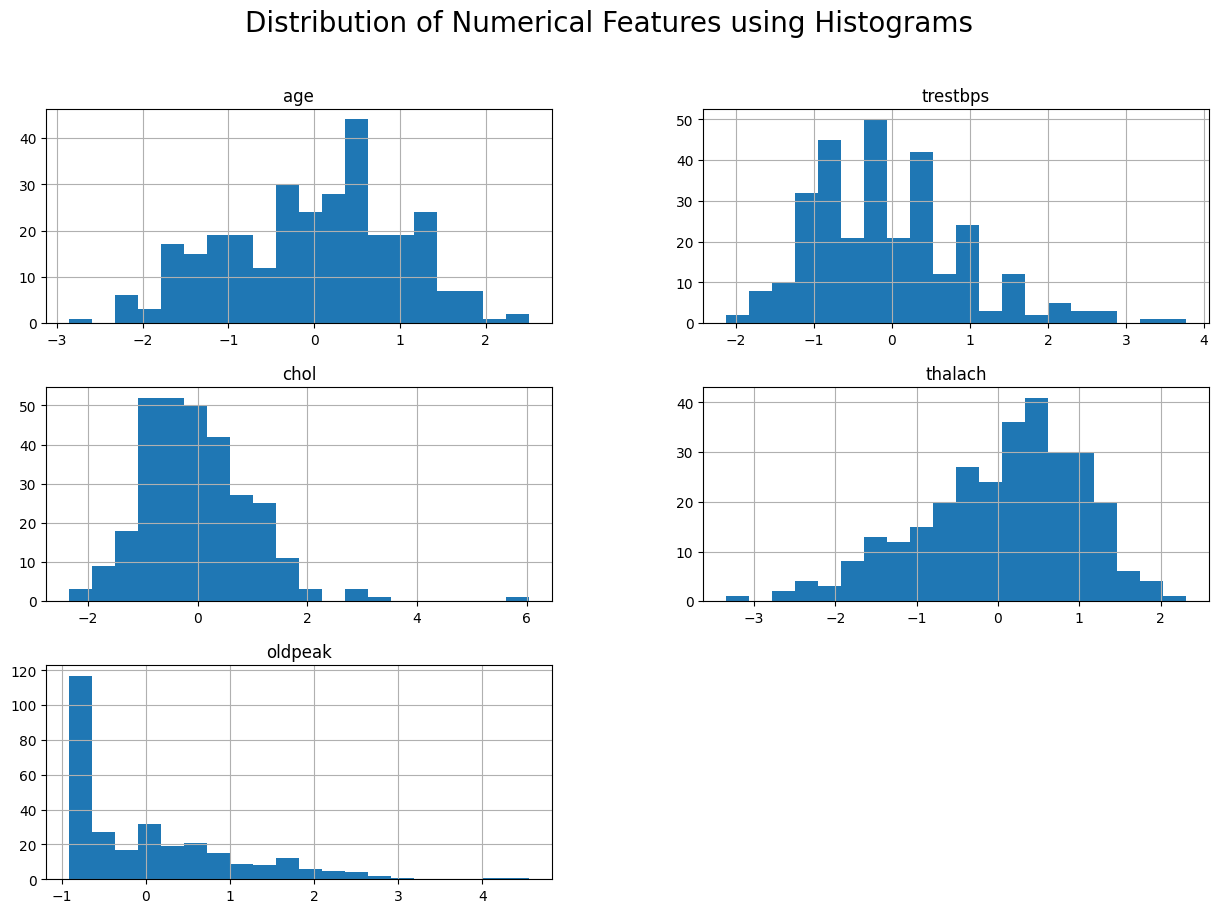

In [ ]:
# Visualize the distribution of numerical features using histograms
full_df_for_eda[num_numerical_cols[:-1]].hist(figsize=(15, 10), bins=20, layout=(3, 2))
plt.suptitle('Distribution of Numerical Features using Histograms', fontsize=20)
plt.show()

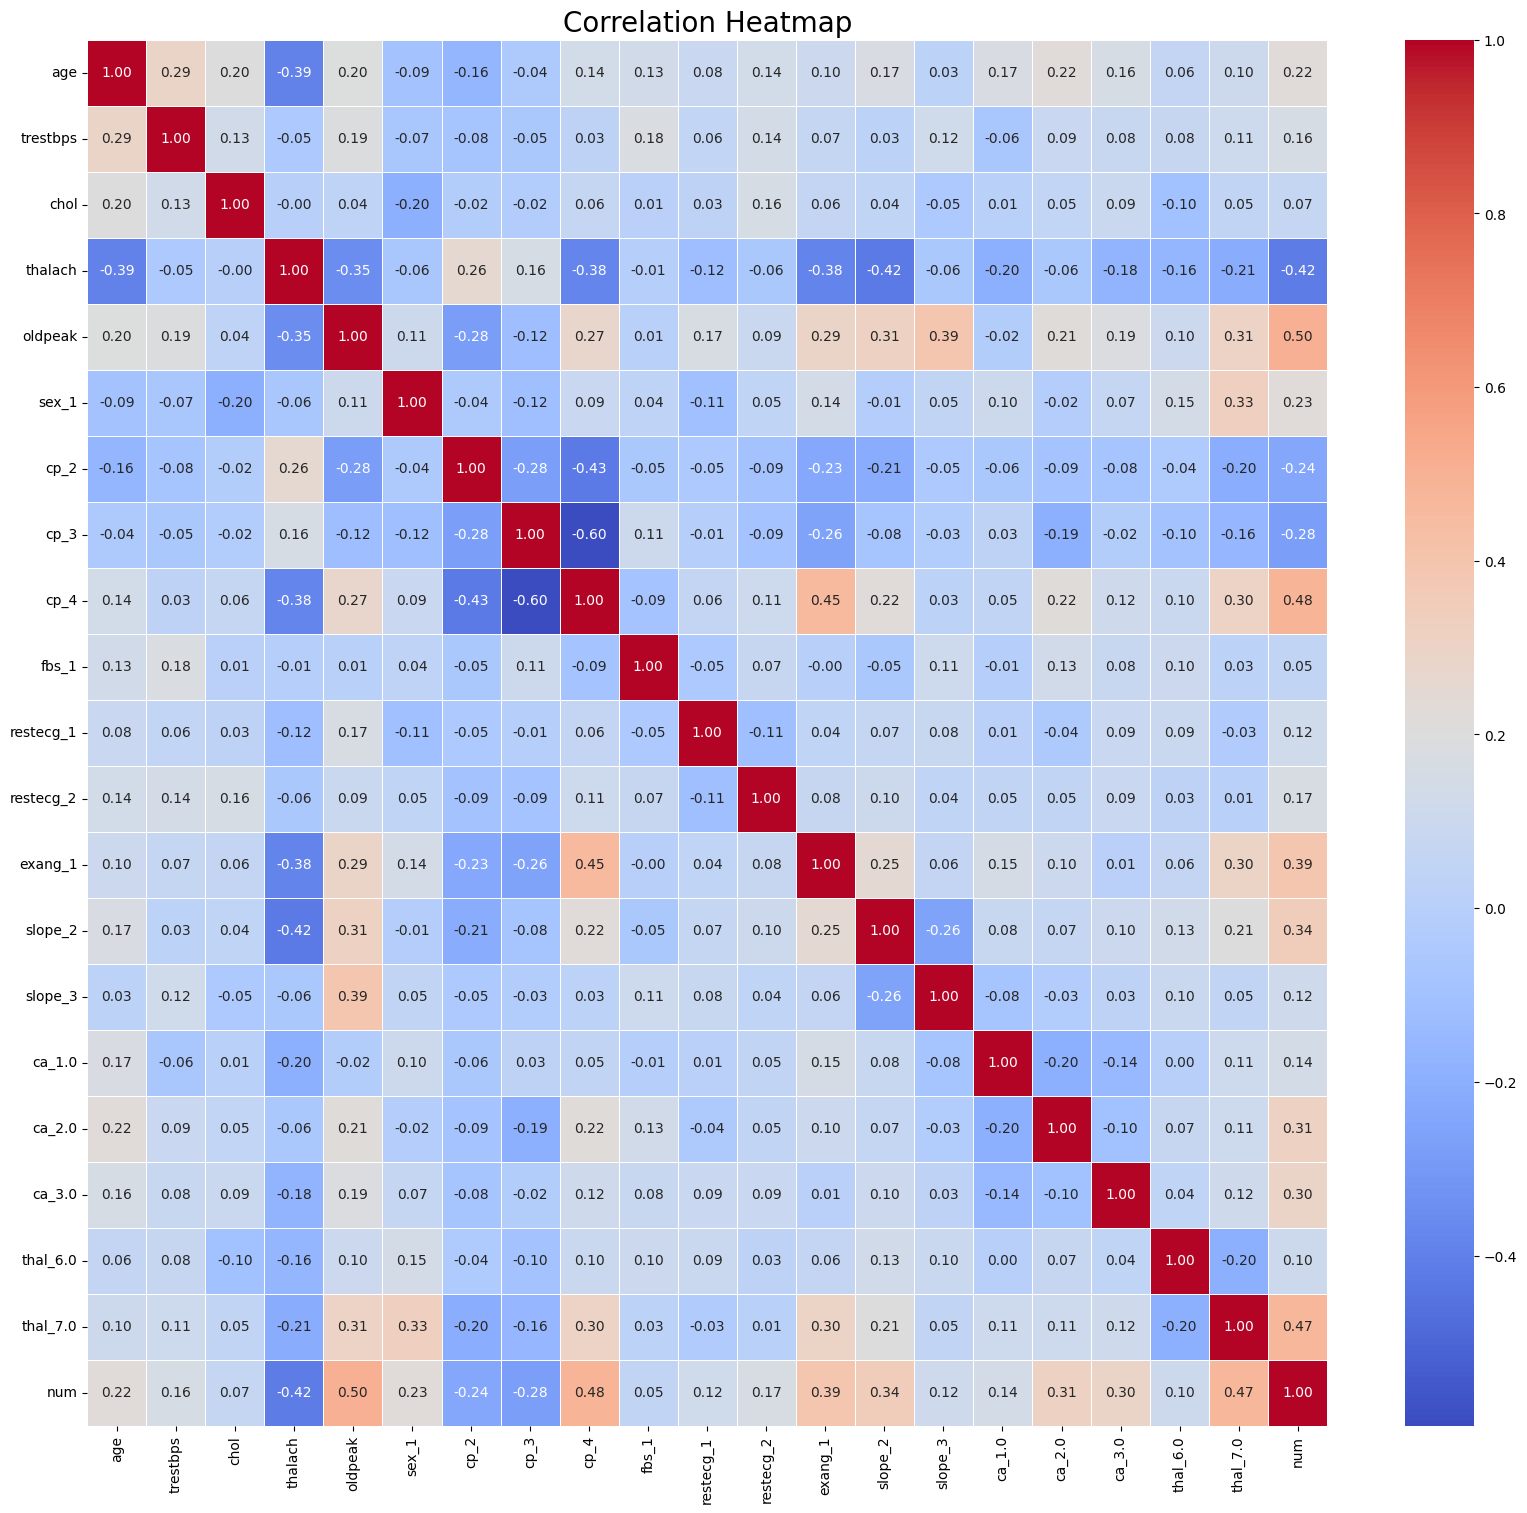

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(full_df_for_eda.corr(), annot=True, linewidths=0.6, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

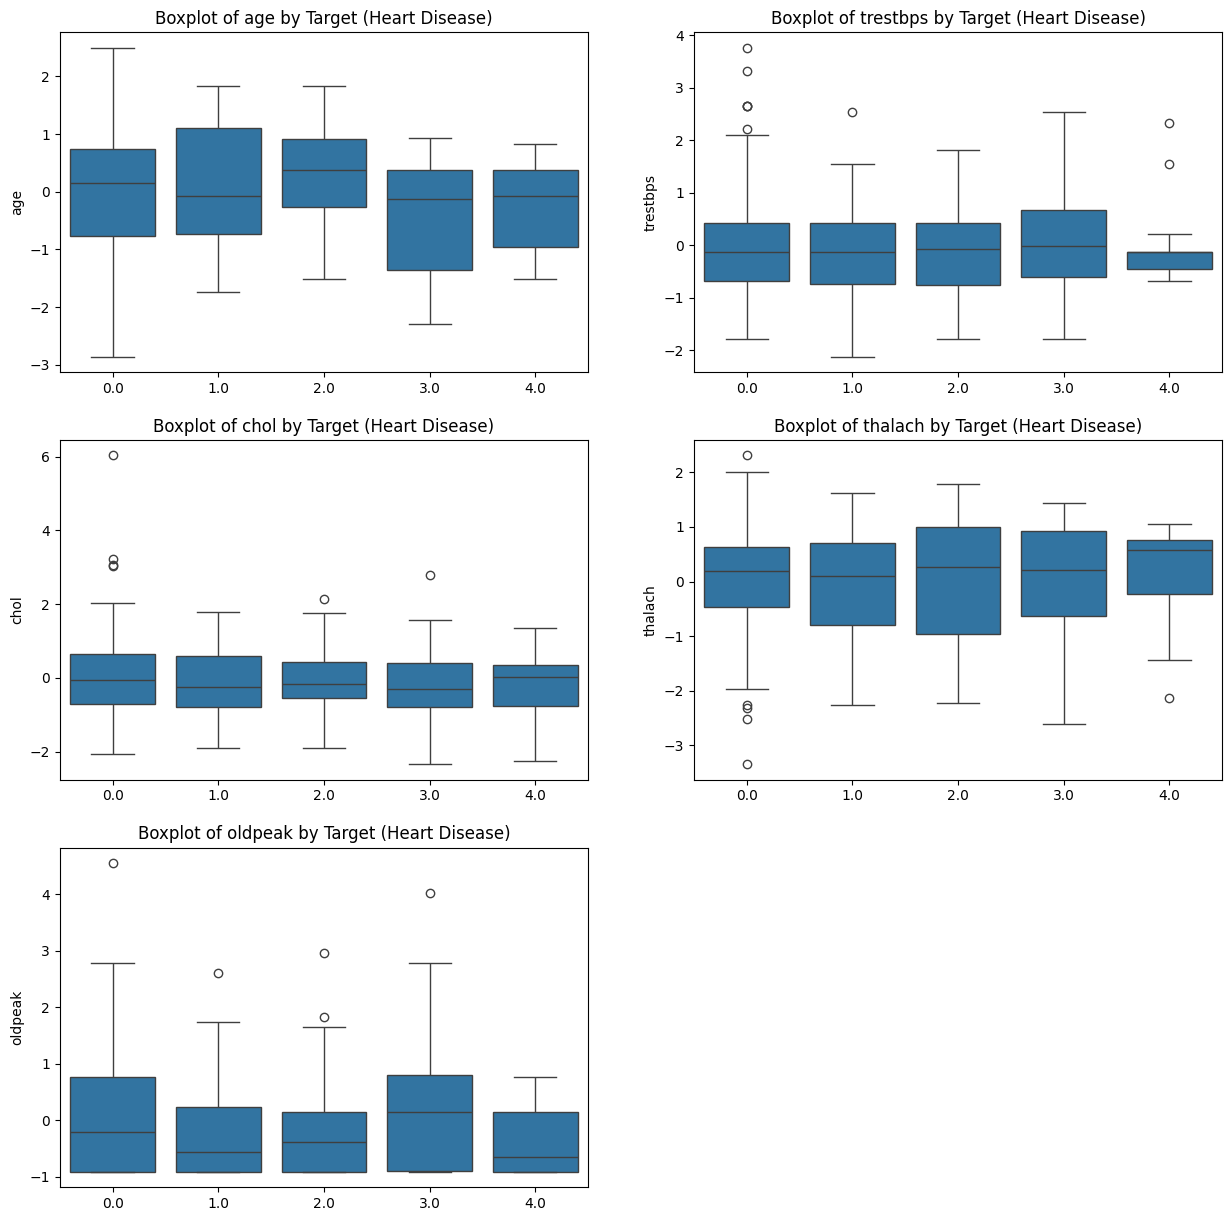

In [ ]:
# Visualize the distribution of numerical features by target
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten() 

for i, col in enumerate(num_numerical_cols[:-1]):
    if i < len(axes):
        sns.boxplot(x=y, y=full_df_for_eda[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} by Target (Heart Disease)')
        axes[i].set_xlabel("")

# Remove empty subplots
for j in range(len(num_numerical_cols[:-1]), len(axes)):
    fig.delaxes(axes[j])
plt.show()

In [ ]:
# Binarize the target variable
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

**Results:**

* Histograms show distributions of key features (e.g., age, cholesterol).
* Correlation heatmap highlights relationships (e.g., `cp` and `thal` show strong links with target).
* Boxplots reveal feature differences between patients with and without disease.

---

## Save Processed Data
* Save processed train and test sets (`X_train`, `X_test`, `y_train`, `y_test`) into CSV files.
* Organize files into `../data/` directory.

In [28]:
import os
output_dir = "../data/"
os.makedirs(output_dir, exist_ok=True)

X_train.to_csv(os.path.join(output_dir, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(output_dir, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(output_dir, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(output_dir, "y_test.csv"), index=False)